# Data Preprocessing

In [24]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Load the xlsx file
excel_data = pd.read_excel('../Data/wage.xlsx', sheet_name="wage")
# Read the values of the file in the dataframe
data = pd.DataFrame(excel_data)
print(data)

        id  nearc2  nearc4  educ  age  fatheduc  motheduc  weight  momdad14  \
0        2       0       0     7   29       NaN       NaN  158413         1   
1        3       0       0    12   27       8.0       8.0  380166         1   
2        4       0       0    12   34      14.0      12.0  367470         1   
3        5       1       1    11   27      11.0      12.0  380166         1   
4        6       1       1    12   34       8.0       7.0  367470         1   
...    ...     ...     ...   ...  ...       ...       ...     ...       ...   
3005  5218       0       1    12   25       8.0      12.0   82135         1   
3006  5219       0       1    13   34       NaN       NaN   88765         1   
3007  5220       0       1    12   24      11.0       NaN   89271         0   
3008  5221       0       1    12   31       NaN       NaN  110376         1   
3009  5225       0       1    13   26       NaN       NaN   81081         0   

      sinmom14  ...  married  libcrd14  exper     l

In [25]:
# Save data as object to file -> easy to read 
with open("../Data/wage_data.dat", "wb") as f:
    pickle.dump(data, f)


In [26]:
# Save all data points
def save_all(path, logfile):
    wage = np.array(data["lwage"])
    flog = open(logfile, "w")
    for x in data.columns:
        plt.cla()
        plt.xlabel(x)
        plt.ylabel("wage")
        plt.title(x+" - wage")
        dtx = data[x]
        plt.plot(dtx, wage, "ro")
        plt.savefig(path + x + ".png")
        flog.write("data {0} is {1}\n".format(x, dtx))
    flog.close()

In [27]:
# Save mean of each data point
def save_mean(path, logfile):
    flog = open(path + logfile, "w")
    for x in data.columns:
        plt.cla()
        plt.xlabel(x)
        plt.ylabel("average wage")
        plt.title(x+" - average wage")
        for dtx in set(data[x]):
            y = data[data[x] == dtx]["lwage"].mean()
            plt.plot(dtx, y, "ro")
        plt.savefig(path + x + ".png")
        flog.write("data {0} is done\n".format(x))
    flog.close()

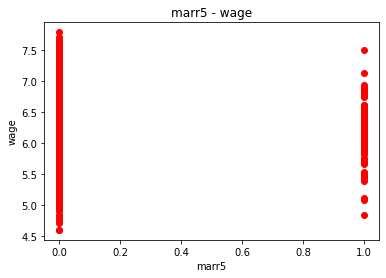

In [28]:
# Save all to images folder (Create images folder before run this code)
save_all("../Data/raw_distribution/", "log.txt")

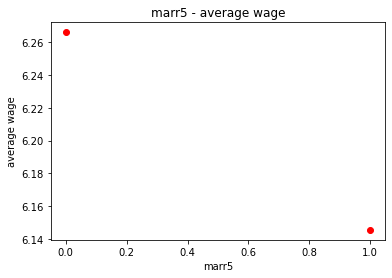

In [29]:
# Save mean to mean_images folder (Create mean_images folder before run this code)
save_mean("../Data/mean_distribution/", "log.txt")

In [30]:
def load_data(fname):
    f = open(fname, "rb")
    data = pickle.load(f)
    f.close()
    return data

def remove_outlier_std(df_in, col_name):
    mean = df_in[col_name].mean()
    std  = df_in[col_name].std() 
    step = 3

    fence_low  = mean - std*step
    fence_high = mean + std*step
    df_out = df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [31]:
# Loading object file is faster than loading xlsx file
data = load_data("../Data/wage_data.dat")

# Change data point difference 1 to 0
data["married"][data["married"] != 1] = 0

<ipython-input-31-2845740b7b71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["married"][data["married"] != 1] = 0


In [32]:
# Variables to train model
data_vars = ["educ","exper","expersq","KWW","black","smsa","married","enroll","south",'reg661','reg662','reg663','reg664','reg665','reg666','reg667','reg668']
# Remove NaN rows and outliers
data_ = data[data_vars + ["lwage"]].dropna()
print("Before remove outliers: {0}".format(data_.shape))
data_ = remove_outlier_std(data_, "lwage")
print("After remove outliers: {0}".format(data_.shape))
# Save data as object to file -> easy to read 
with open("../Data/wage_processed_data.dat", "wb") as f:
    pickle.dump(data_, f)

Before remove outliers: (2963, 18)
After remove outliers: (2949, 18)


# Data Analysis

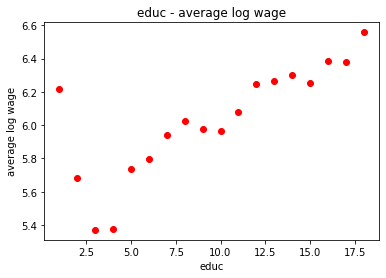

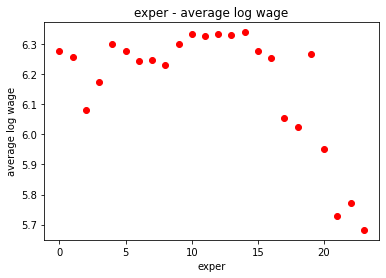

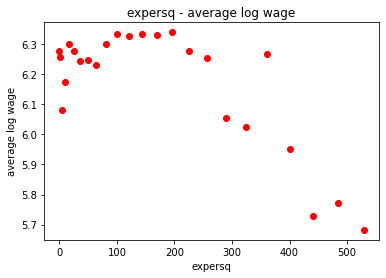

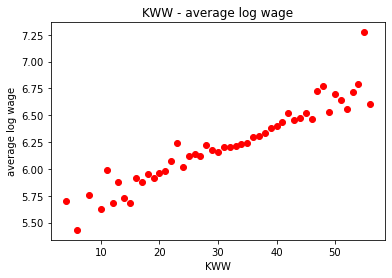

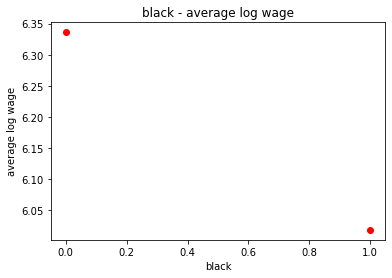

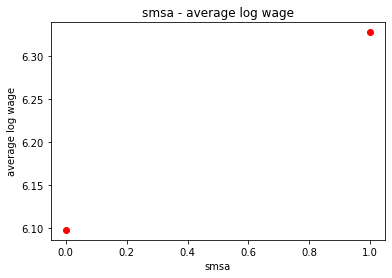

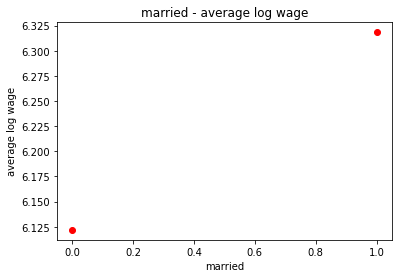

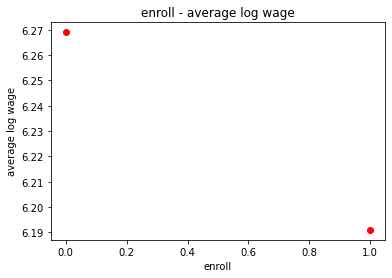

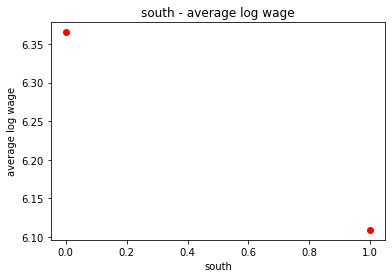

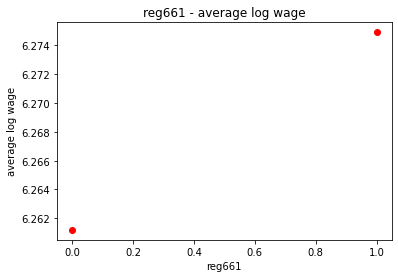

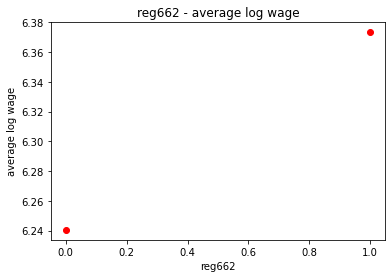

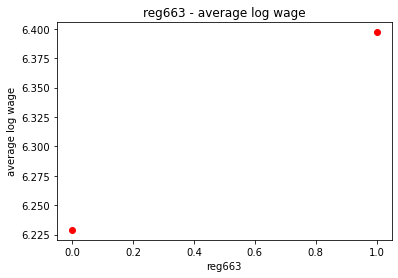

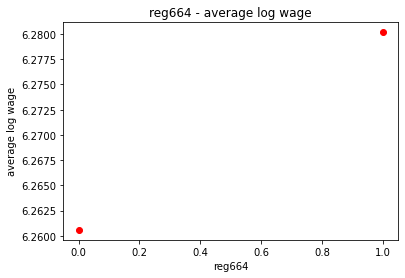

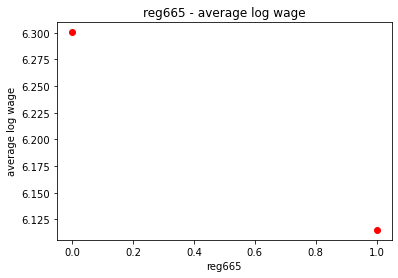

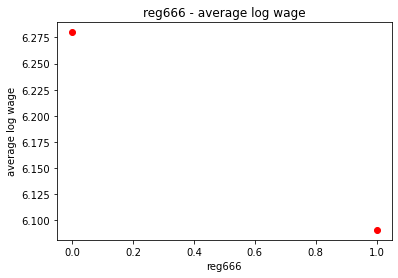

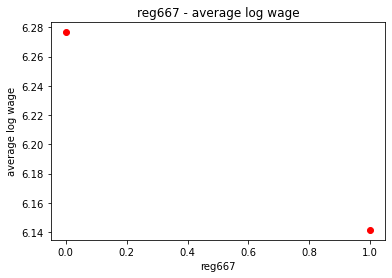

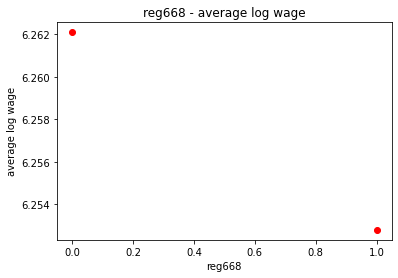

In [33]:
# Display mean of data points
for x in data_vars:
    plt.cla()
    plt.xlabel(x)
    plt.ylabel("average log wage")
    plt.title(x+" - average log wage")
    for dtx in set(data[x]):
        y = data[data[x] == dtx]["lwage"].mean()
        plt.plot(dtx, y, "ro")
    plt.show()